In [45]:
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import itertools
print(check_output(["ls", "data"]).decode("utf8"))

data = pd.read_csv("data/hmeq.csv")
data.groupby('BAD').size()

bank.csv
hmeq.csv



BAD
0    4771
1    1189
dtype: int64

In [46]:
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [47]:
data.dropna(inplace=True)

In [48]:
#Пустые значения
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [49]:
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
34,0,2900,103949.0,112505.0,HomeImp,Office,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136
35,0,2900,104373.0,120702.0,HomeImp,Office,2.0,0.0,0.0,101.540298,0.0,13.0,29.915859
36,1,2900,7750.0,67996.0,HomeImp,Other,16.0,3.0,0.0,122.204663,2.0,8.0,36.211348
37,1,2900,61962.0,70915.0,DebtCon,Mgr,2.0,0.0,0.0,282.801659,3.0,37.0,49.206396
38,0,3000,104570.0,121729.0,HomeImp,Office,2.0,0.0,0.0,85.884372,0.0,14.0,32.059783


In [50]:
data['REASON'].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [51]:
#Размерность таблицы
data.shape

(3364, 13)

In [52]:
#Замена строковых типов числовым
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,0,343,90,1,2,9,0,0,552,1,8,2104
7,1,1,313,117,1,2,11,0,0,370,0,8,2057
19,0,2,2688,2457,1,1,2,0,0,407,0,13,1117
25,1,3,420,171,1,0,12,0,0,155,1,21,2341
26,0,3,2621,2366,1,1,4,0,0,450,0,13,893


In [53]:
#Проверка замены типов
data['JOB'].unique()

array([2, 1, 0, 3, 4, 5])

In [54]:
X = data.drop('BAD', axis=1)
y = data['BAD']
X.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,0,343,90,1,2,9,0,0,552,1,8,2104
7,1,313,117,1,2,11,0,0,370,0,8,2057
19,2,2688,2457,1,1,2,0,0,407,0,13,1117
25,3,420,171,1,0,12,0,0,155,1,21,2341
26,3,2621,2366,1,1,4,0,0,450,0,13,893


In [55]:
y.head()

5     1
7     1
19    0
25    1
26    0
Name: BAD, dtype: int64

In [56]:
X.describe()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000,3364.000000,3364.00000
mean,157.778537,1659.676576,1664.389417,0.295779,1.947979,9.105826,0.146849,0.278537,1681.50000,1.037158,22.094530,1681.50000
std,90.776529,957.342720,959.990207,0.456460,1.139914,7.580715,0.579524,0.806237,971.24748,1.547576,9.314474,971.24748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,91.000000,831.750000,834.750000,0.000000,1.000000,3.000000,0.000000,0.000000,840.75000,0.000000,16.000000,840.75000
50%,141.000000,1656.500000,1666.500000,0.000000,2.000000,7.000000,0.000000,0.000000,1681.50000,1.000000,21.000000,1681.50000
75%,209.250000,2489.250000,2491.250000,1.000000,3.000000,13.000000,0.000000,0.000000,2522.25000,2.000000,27.000000,2522.25000
max,467.000000,3321.000000,3331.000000,1.000000,5.000000,36.000000,10.000000,9.000000,3363.00000,12.000000,56.000000,3363.00000


In [57]:
data.corr()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.033562,-0.040912,-0.054560,-0.006247,0.011537,-0.064917,0.253711,0.274872,-0.134828,0.125278,0.004216,0.155853
LOAN,-0.033562,1.000000,0.188900,0.336566,-0.211158,0.080677,0.081504,-0.021725,-0.073069,0.088164,0.056421,0.103446,0.204860
MORTDUE,-0.040912,0.188900,1.000000,0.843445,-0.011764,0.095574,-0.107764,-0.037492,-0.045963,0.120869,0.026136,0.322413,0.218680
VALUE,-0.054560,0.336566,0.843445,1.000000,0.022672,0.165214,-0.035447,-0.048247,-0.061604,0.198360,-0.015566,0.255866,0.158843
REASON,-0.006247,-0.211158,-0.011764,0.022672,1.000000,0.102729,0.084447,-0.004625,0.024123,0.024735,-0.135951,-0.051338,-0.041133
JOB,0.011537,0.080677,0.095574,0.165214,0.102729,1.000000,-0.057551,-0.009588,-0.032438,0.105849,-0.086217,0.090613,-0.059557
YOJ,-0.064917,0.081504,-0.107764,-0.035447,0.084447,-0.057551,1.000000,-0.055791,0.022713,0.237486,-0.045908,-0.001119,-0.037984
DEROG,0.253711,-0.021725,-0.037492,-0.048247,-0.004625,-0.009588,-0.055791,1.000000,0.148540,-0.051947,0.181903,0.062099,0.023774
DELINQ,0.274872,-0.073069,-0.045963,-0.061604,0.024123,-0.032438,0.022713,0.148540,1.000000,0.017198,0.003618,0.124190,0.015339
CLAGE,-0.134828,0.088164,0.120869,0.198360,0.024735,0.105849,0.237486,-0.051947,0.017198,1.000000,-0.076265,0.234409,0.007170


In [59]:
data = data.drop('VALUE', 1)
data.corr()

,BAD,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.033562,-0.040912,-0.006247,0.011537,-0.064917,0.253711,0.274872,-0.134828,0.125278,0.004216,0.155853
LOAN,-0.033562,1.000000,0.188900,-0.211158,0.080677,0.081504,-0.021725,-0.073069,0.088164,0.056421,0.103446,0.204860
MORTDUE,-0.040912,0.188900,1.000000,-0.011764,0.095574,-0.107764,-0.037492,-0.045963,0.120869,0.026136,0.322413,0.218680
REASON,-0.006247,-0.211158,-0.011764,1.000000,0.102729,0.084447,-0.004625,0.024123,0.024735,-0.135951,-0.051338,-0.041133
JOB,0.011537,0.080677,0.095574,0.102729,1.000000,-0.057551,-0.009588,-0.032438,0.105849,-0.086217,0.090613,-0.059557
YOJ,-0.064917,0.081504,-0.107764,0.084447,-0.057551,1.000000,-0.055791,0.022713,0.237486,-0.045908,-0.001119,-0.037984
DEROG,0.253711,-0.021725,-0.037492,-0.004625,-0.009588,-0.055791,1.000000,0.148540,-0.051947,0.181903,0.062099,0.023774
DELINQ,0.274872,-0.073069,-0.045963,0.024123,-0.032438,0.022713,0.148540,1.000000,0.017198,0.003618,0.124190,0.015339
CLAGE,-0.134828,0.088164,0.120869,0.024735,0.105849,0.237486,-0.051947,0.017198,1.000000,-0.076265,0.234409,0.007170
NINQ,0.125278,0.056421,0.026136,-0.135951,-0.086217,-0.045908,0.181903,0.003618,-0.076265,1.000000,0.078763,0.176505


-----------------------------------
Логистическая регрессия
Confusion matrix, without normalization
[[1001   11]
 [  79   20]]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


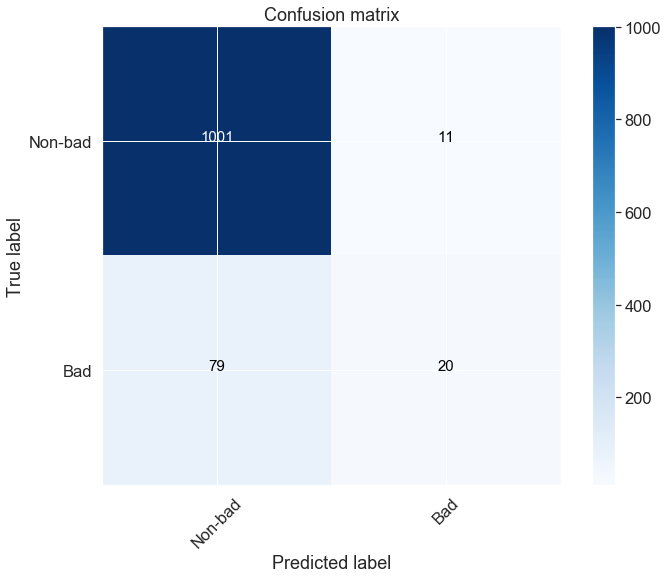

In [60]:
print("-----------------------------------")
print("Логистическая регрессия")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model_LR.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-bad', 'Bad'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

#y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities
#y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

#confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
#print("Confusion matrix:")
#confusion_matrix

In [61]:
# To get the weights of all the variables
weights = pd.Series(model_LR.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

DEROG      0.817772
DELINQ     0.745640
JOB        0.219010
NINQ       0.097696
REASON     0.014081
DEBTINC    0.000580
VALUE      0.000072
MORTDUE   -0.000253
CLAGE     -0.000500
LOAN      -0.001347
CLNO      -0.020659
YOJ       -0.022923
dtype: float64

In [62]:
report = classification_report(y_test, model_LR.predict(X_test), target_names=['Non-bad', 'Bad'])
print(report)

              precision    recall  f1-score   support

     Non-bad       0.93      0.99      0.96      1012
         Bad       0.65      0.20      0.31        99

   micro avg       0.92      0.92      0.92      1111
   macro avg       0.79      0.60      0.63      1111
weighted avg       0.90      0.92      0.90      1111



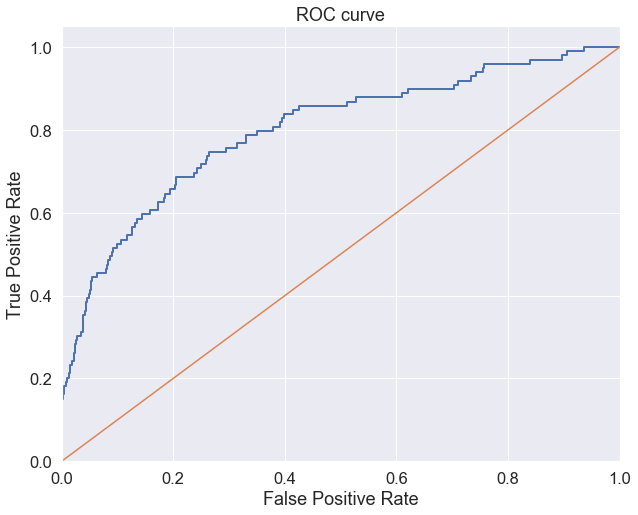

In [63]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [64]:
auc_roc=roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.7990677526250649

In [65]:
prediction_test = model_LR.predict(X_test)
print("Accuracy: ")
accuracy_score(y_test, prediction_test)

Accuracy: 


0.918991899189919

-----------------------------------
Случайный лес
Confusion matrix, without normalization
[[1011    1]
 [  49   50]]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


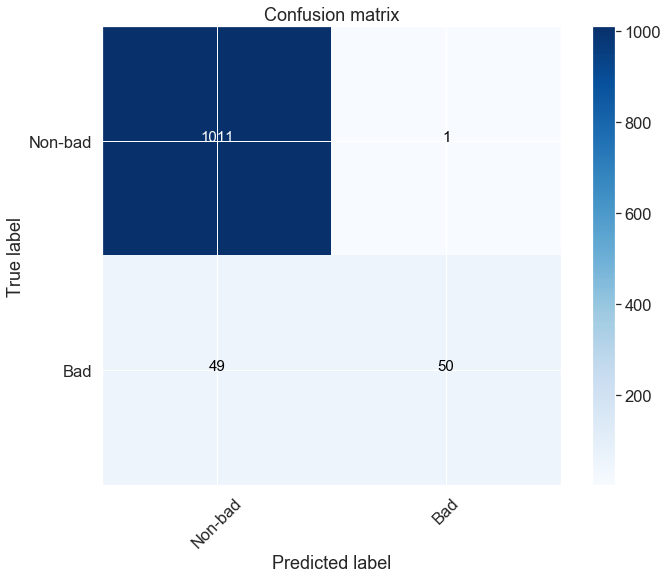

In [66]:
print("-----------------------------------")
print("Случайный лес")

model_RR=RandomForestClassifier()
model_RR.fit(X_train,y_train)

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model_RR.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-bad', 'Bad'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [67]:
prediction_test = model_RR.predict(X_test)
print("Accuracy: ")
accuracy_score(y_test, prediction_test)

Accuracy: 


0.954995499549955

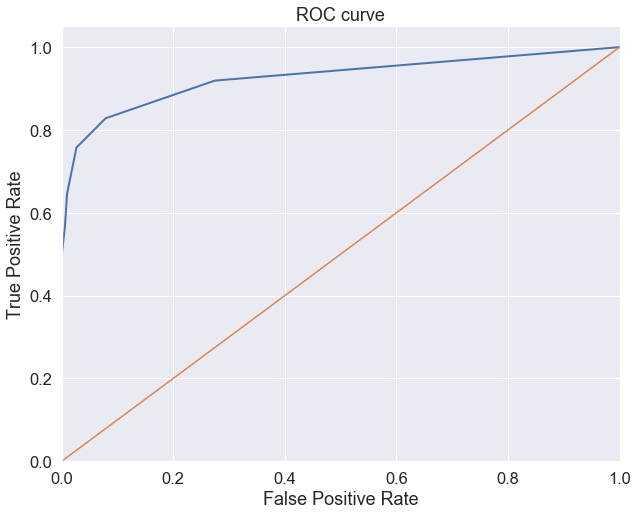

In [68]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_RR.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [69]:
auc_roc=roc_auc_score(y_test, model_RR.predict_proba(X_test)[:,1])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.9257545813869925

In [70]:
report = classification_report(y_test, model_RR.predict(X_test), target_names=['Non-bad', 'Bad'])
print(report)

              precision    recall  f1-score   support

     Non-bad       0.95      1.00      0.98      1012
         Bad       0.98      0.51      0.67        99

   micro avg       0.95      0.95      0.95      1111
   macro avg       0.97      0.75      0.82      1111
weighted avg       0.96      0.95      0.95      1111



-----------------------------------
К-случайных соседей
Confusion matrix, without normalization
[[1010    2]
 [  84   15]]


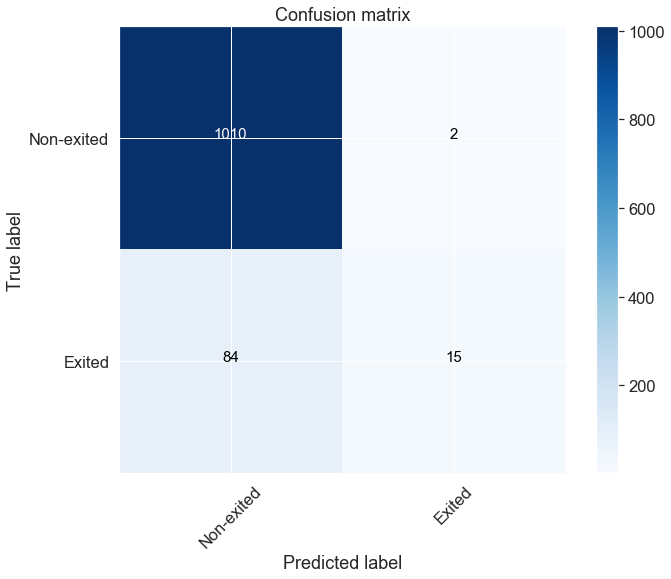

In [71]:
print("-----------------------------------")
print("К-случайных соседей")

model_KN=KNeighborsClassifier()
model_KN.fit(X_train, y_train)

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model_KN.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-exited', 'Exited'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [72]:
prediction_test = model_KN.predict(X_test)
print("Accuracy: ")
accuracy_score(y_test, prediction_test)

Accuracy: 


0.9225922592259226

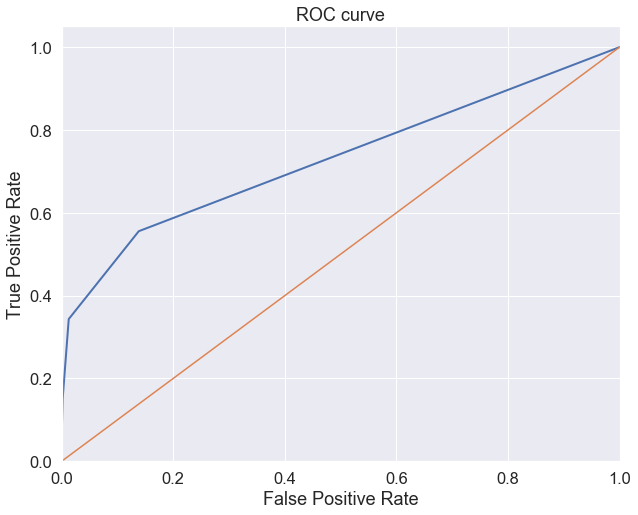

In [73]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_KN.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [74]:
auc_roc=roc_auc_score(y_test, model_KN.predict_proba(X_test)[:,1])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.7294785802690942

In [75]:
report = classification_report(y_test, model_KN.predict(X_test), target_names=['Non-bad', 'Bad'])
print(report)

              precision    recall  f1-score   support

     Non-bad       0.92      1.00      0.96      1012
         Bad       0.88      0.15      0.26        99

   micro avg       0.92      0.92      0.92      1111
   macro avg       0.90      0.57      0.61      1111
weighted avg       0.92      0.92      0.90      1111

